Praktikum Machine Learning: Klasifikasi Data (Dataset Iris)

**Langkah 1: Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Langkah 2: Load Dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

print("Jumlah data:", X.shape[0])
print("Jumlah fitur:", X.shape[1])
print("Nama label:", iris.target_names)

Jumlah data: 150
Jumlah fitur: 4
Nama label: ['setosa' 'versicolor' 'virginica']


# Langkah 3: Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Langkah 4: Normalisasi Data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Langkah 5: Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=iris.target_names))

=== Logistic Regression ===
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Langkah 6: K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("=== KNN (k=5) ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))


=== KNN (k=5) ===
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Langkah 7: Decision Tree

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("=== Decision Tree ===")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=iris.target_names))


=== Decision Tree ===
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Langkah 8: Support Vector Machine (SVM)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("=== SVM (Linear Kernel) ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=iris.target_names))


=== SVM (Linear Kernel) ===
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Langkah 9: Bandingkan Model dengan Visualisasi

Logistic Regression: 1.000
KNN: 1.000
Decision Tree: 1.000
SVM: 0.967


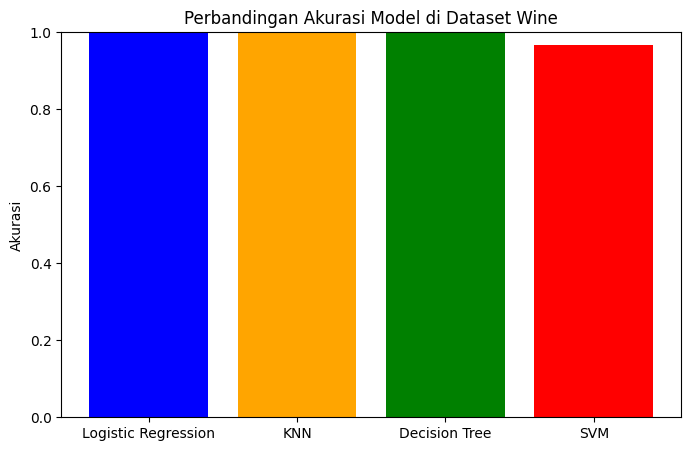

In [ ]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Tampilkan tabel ringkas
for model, acc in results.items():
    print(f"{model}: {acc:.3f}")

# Visualisasi
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue','orange','green','red'])
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model di Dataset Wine")
plt.ylim(0,1)
plt.show()